In [1]:
import random

import numpy as np
from matplotlib import pyplot as plt

from quickga import Organism
from quickga.traits import PermutationTrait

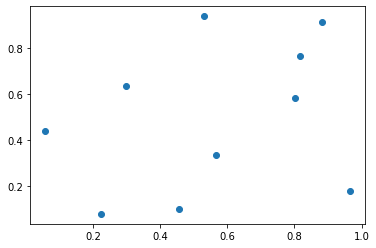

In [2]:
points = [[random.random(), random.random()] for _ in range(10)]

def plot_path(points, style=''):
    points = np.array(points)
    plt.plot(points[:,0], points[:,1], style)
    plt.show()

plot_path(points, 'o')

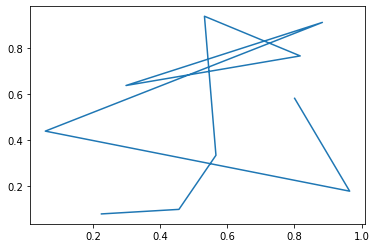

In [3]:
class TravellingSalesman(Organism):

    def __init__(self, points):
        super().__init__(points)
        self.path = PermutationTrait(points)

    def fitness_function(self):
        distance = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
        total_distance = np.sum([distance(self.path[i], self.path[i-1]) for i in range(1, len(self.path))])
        return 1/total_distance

jeff = TravellingSalesman(points)
plot_path(jeff.path)

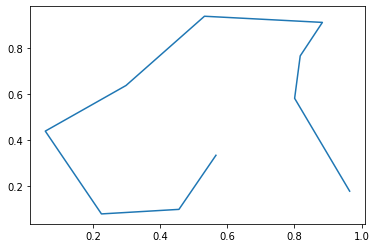

In [4]:
history = jeff.evolve(
    population_size=100,
    num_generations=100
)
plot_path(jeff.path)